In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df = pd.read_csv('/home/bmatore/projects/mlbookcamp-code/data/Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.shape

(30, 2)

In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
df.isnull().values.any()

False

(<AxesSubplot:xlabel='Salary', ylabel='Count'>,)

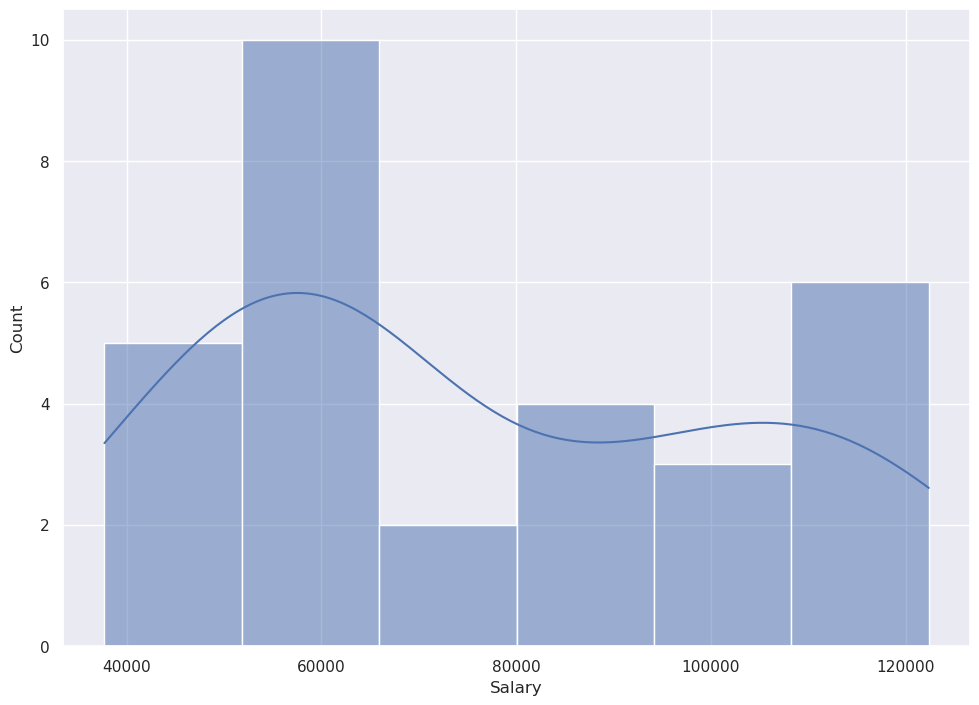

In [8]:
sns.histplot(df['Salary'], kde = True),

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

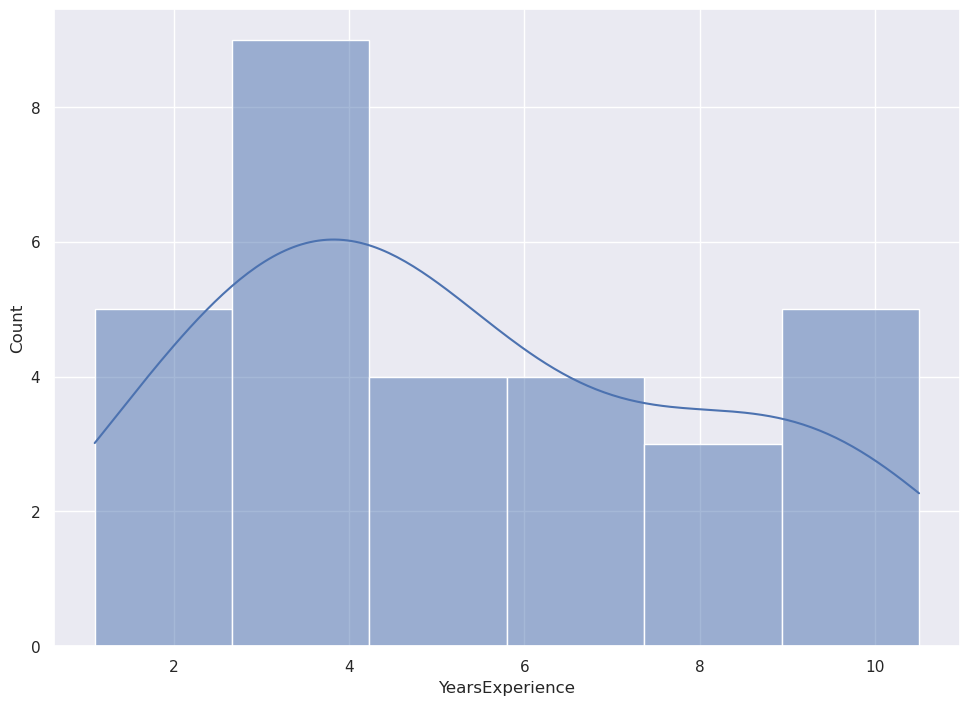

In [9]:
sns.histplot(df['YearsExperience'], kde = True)

In [10]:
df['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [23]:
df.Salary.median()

65237.0

/home/bmatore/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

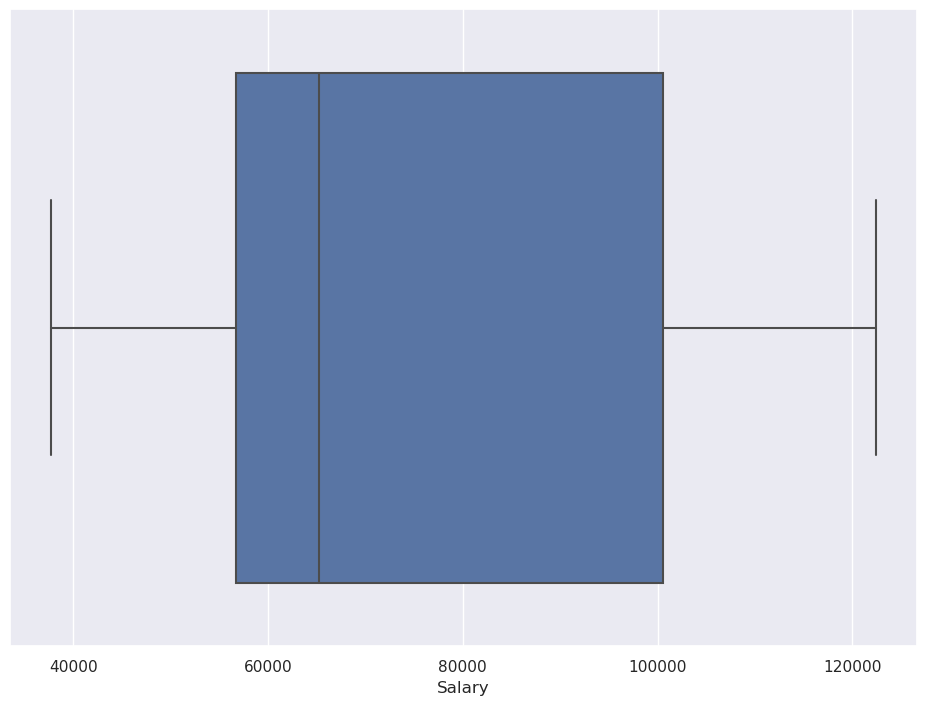

In [11]:
sns.boxplot(df['Salary'])

In [12]:
df['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

/home/bmatore/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

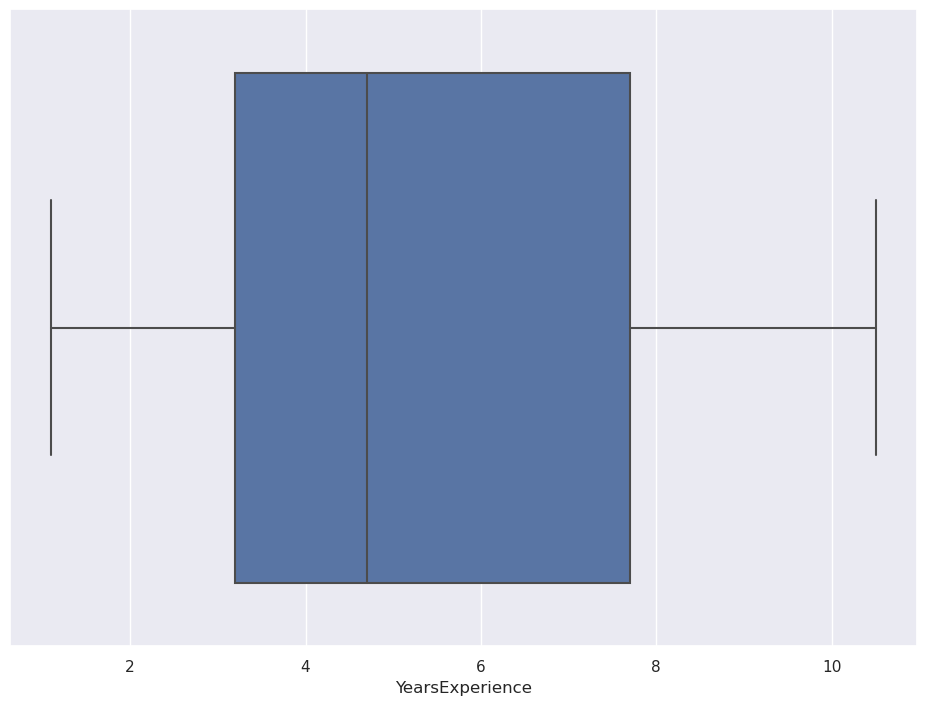

In [13]:
sns.boxplot(df['YearsExperience'])

Text(0.5, 1.0, "Q-Q plot of 'YearsExperience'")

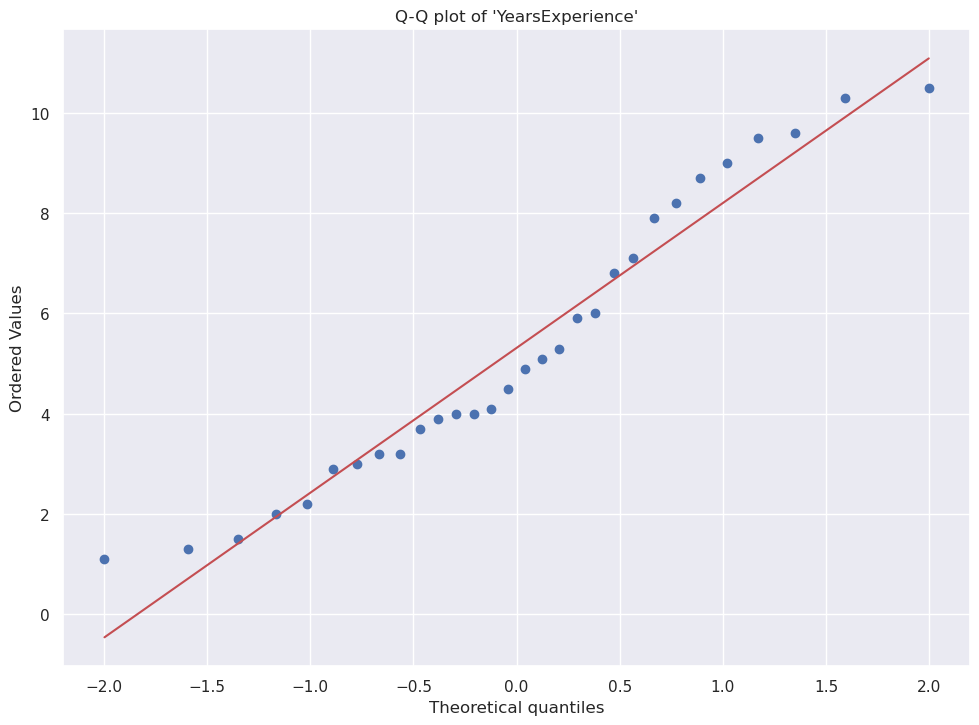

In [14]:
# Normal Q-Q plot
probplot(df['YearsExperience'], plot=plt)
plt.title("Q-Q plot of 'YearsExperience'")

Text(0.5, 1.0, "Q-Q plot of 'Years Experience'")

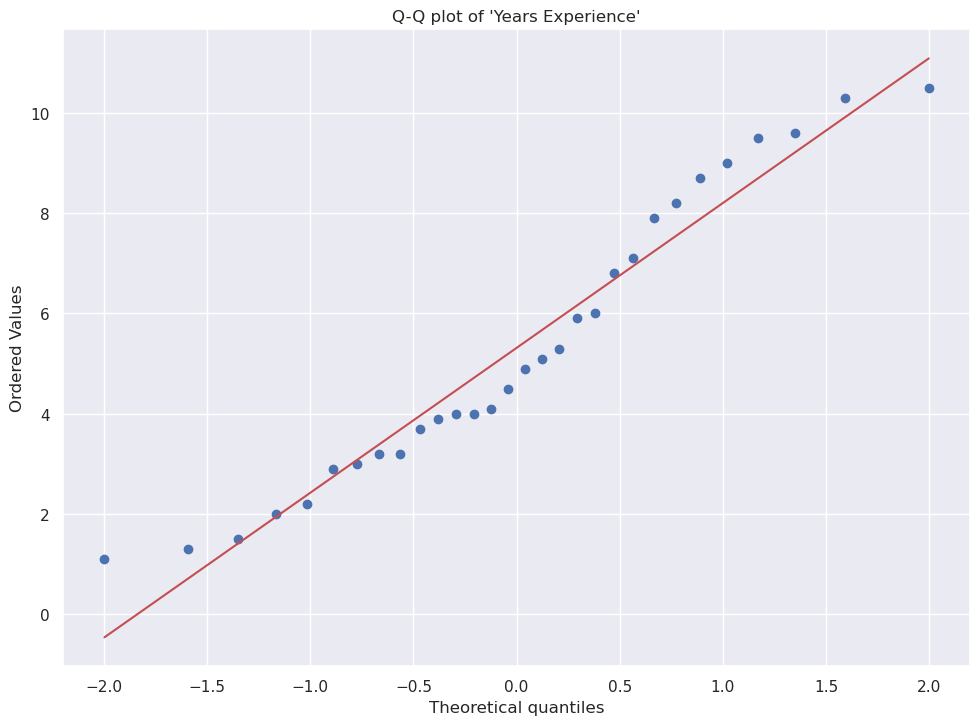

In [16]:
probplot(df['YearsExperience'], plot=plt)
plt.title("Q-Q plot of 'Years Experience'")

In [17]:
#perform Shapiro-Wilk test for normality

from scipy.stats import shapiro 

shapiro(df.Salary)

ShapiroResult(statistic=0.9103151559829712, pvalue=0.015155306085944176)

p vlaue < 0.05. Reject null hypothesis. Salary does not come from a normal distribution

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

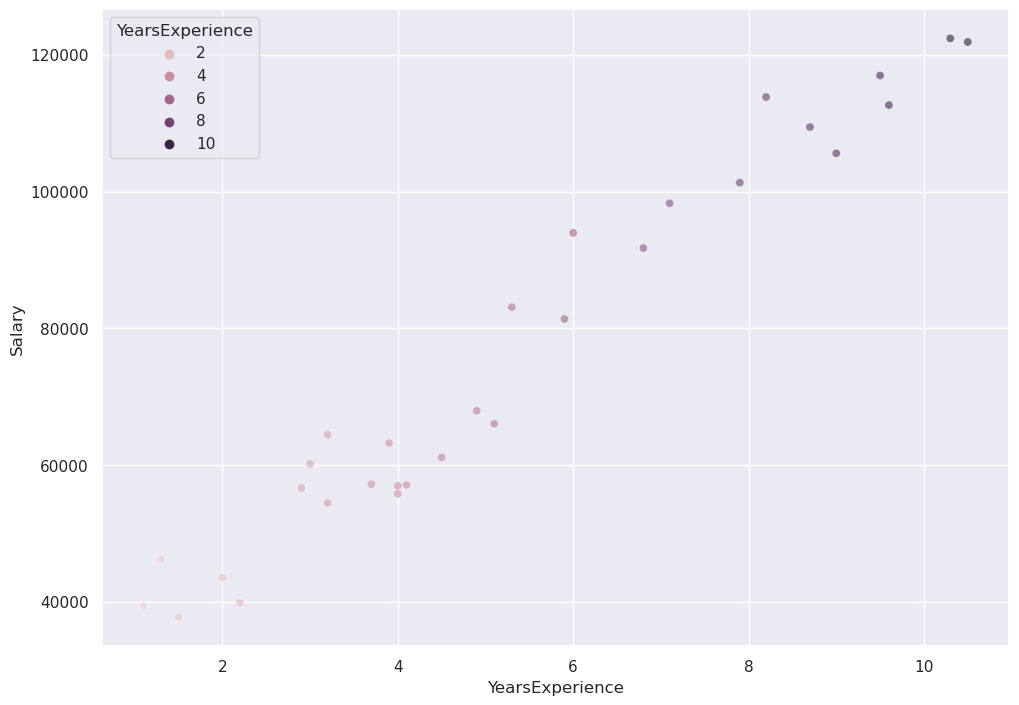

In [42]:
sns.scatterplot(data=df, x="YearsExperience", y="Salary", hue="YearsExperience", alpha=0.6)

<AxesSubplot:>

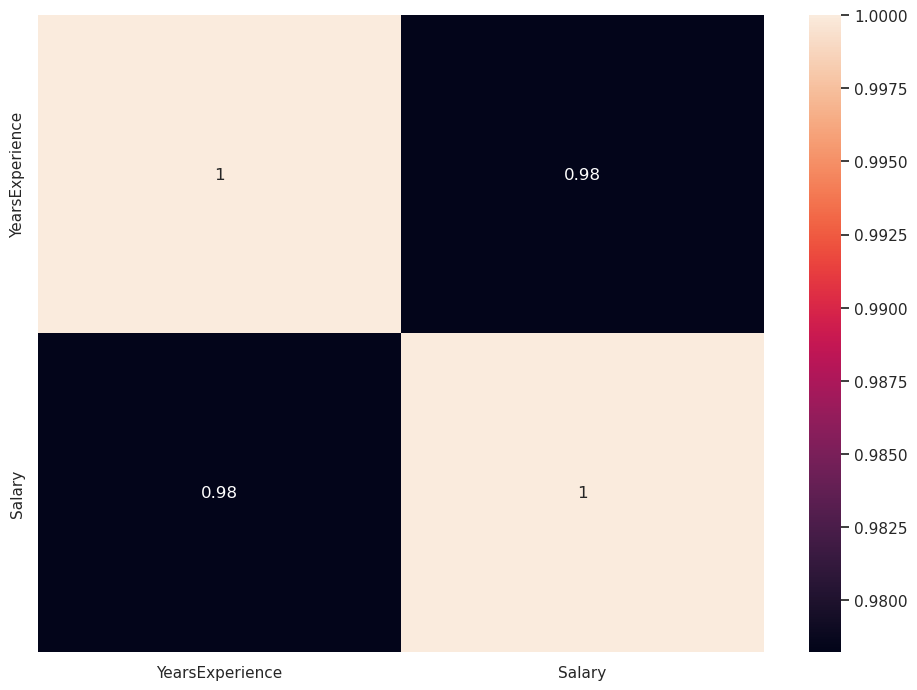

In [43]:
sns.heatmap(df.corr(), annot=True)

In [44]:
# Create new columns for the normalized values
df['Norm_YearsExperience'] = preprocessing.normalize(df[['YearsExperience']], axis=0)
df['Norm_Salary'] = preprocessing.normalize(df[['Salary']], axis=0)
df.head()

,YearsExperience,Salary,Norm_YearsExperience,Norm_Salary
0,1.1,39343.0,0.033464,0.089074
1,1.3,46205.0,0.039549,0.104610
2,1.5,37731.0,0.045633,0.085424
3,2.0,43525.0,0.060844,0.098542
4,2.2,39891.0,0.066928,0.090315


In [67]:
df.columns

Index(['YearsExperience', 'Salary', 'Norm_YearsExperience', 'Norm_Salary'], dtype='object')

In [18]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1:2].values

In [19]:
print(y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [20]:
from random import random

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train, X_test = 

In [21]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
regressor.coef_

array([[9353.81113309]])

In [23]:
regressor.intercept_

array([26669.5098912])

In [24]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [25]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[115530.72 116969.  ]
 [ 72503.18  67938.  ]
 [123013.76 122391.  ]
 [ 74373.95  66029.  ]
 [ 93081.57  98273.  ]
 [ 61278.61  57189.  ]]


In [27]:
# Checking the MSE
print("Mean squared error(MSE): %.2f" % mean_squared_error(y_test, y_pred))

# Checking the R2 value
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

Mean squared error(MSE): 22768569.46
Coefficient of determination: 0.966


In [ ]:
import statsmodels.api as sm

In [32]:
features = list(df.iloc[:, 0:1].columns)

In [30]:
mod = sm.OLS(X_train,y_train).fit()

In [33]:
mod.summary(xname=features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              663.5
Date:                Thu, 29 Sep 2022   Prob (F-statistic):                    1.83e-18
Time:                        14:05:17   Log-Likelihood:                         -34.921
No. Observations:                  24   AIC:                                      71.84
Df Residuals:                      23   BIC:                                      73.02
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  7.176e-05   2.79e-06     25.759      0.000     6.6e-05    7.75e-05
==============================================================================
Omnibus:                        0.910   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.909
Skew:                           0.373   Prob(JB):                        0.635
Kurtosis:                       2.405   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [35]:
model = LinearRegression()
run_experiment(model)

R^2 :  0.9655187204381681
MAE : 4042.0370278785254
RMSE: 4771.642218838493
